In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
eventsData=pd.read_csv("events_subset.csv")
print(eventsData[0:2])
#eventsData.describe()
#event_id is PK here;device_id may get duplicated
#longitude: -180 to 151 : Continuous
#latitude: -37 to 53.64 : Continuous

   event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97


In [3]:
deviceIdGroup=eventsData.groupby("device_id").groups
deviceIDGroupDict=[(key,len(deviceIdGroup[key])) for key in deviceIdGroup.keys()]
#sorted(deviceIDGroupDict)
mostActiveDeviceIds=sorted(deviceIDGroupDict,key=lambda x: x[1],reverse=True)[0:10]
print(mostActiveDeviceIds)

[(1186608308763918427, 937), (3915082290673137129, 493), (-1656894751624916732, 229), (2504414082456157897, 135), (-3746248670824158209, 115), (-7369693784883843916, 113), (8339429008953975436, 110), (-6242501228649113250, 110), (-17299534936664237, 108), (-8340098378141155823, 104)]


In [4]:
#As expected => Very High Correlation between longitude and latitude : 0.947287
eventsData.corr()

,event_id,device_id,longitude,latitude
event_id,1.000000,0.001050,-0.003879,-0.004633
device_id,0.001050,1.000000,-0.013765,-0.007659
longitude,-0.003879,-0.013765,1.000000,0.947287
latitude,-0.004633,-0.007659,0.947287,1.000000


======Movement of a Random device ========================>


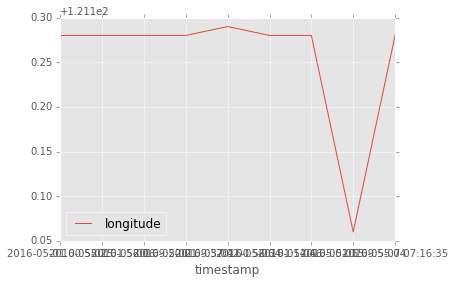

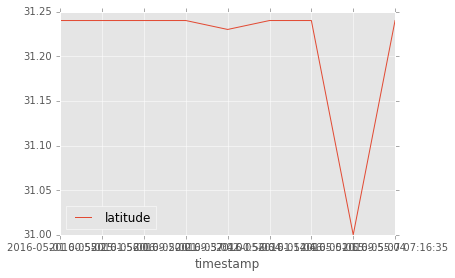

======Movement of the most active device ========================>


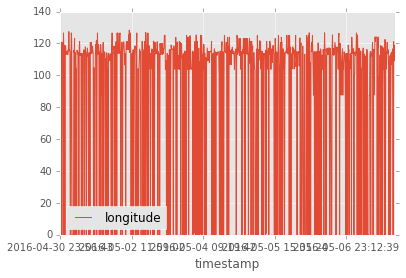

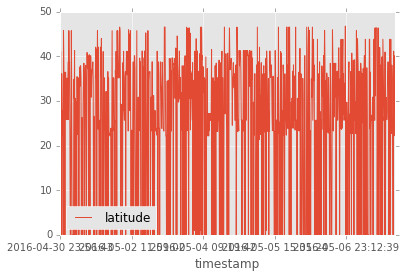

In [13]:
deviceIdGroupObj=eventsData.groupby("device_id")
deviceIdGroupObj.ngroups#27310 Unique values of Device_id
print("======Movement of a Random device ========================>")
eventsDataForARandomDevice=eventsData[eventsData.device_id==29182687948017175]
eventsDataForARandomDevice=eventsDataForARandomDevice.sort_values(['timestamp'])
eventsDataForARandomDevice.plot(x='timestamp',y='longitude')
eventsDataForARandomDevice.plot(x='timestamp',y='latitude')
plt.show()#Very Random Movement in long and lat data : Seems like this Person travels a lot
print("======Movement of the most active device ========================>")
eventsDataFor1Device=eventsData[eventsData.device_id==mostActiveDeviceIds[0][0]]
eventsDataFor1Device=eventsDataFor1Device.sort_values(['timestamp'])
eventsDataFor1Device.plot(x='timestamp',y='longitude')
eventsDataFor1Device.plot(x='timestamp',y='latitude')
plt.show()#Very Random Movement in long and lat data : Seems like this Person travels a lot

======Movement of the 2nd most active device ========================>


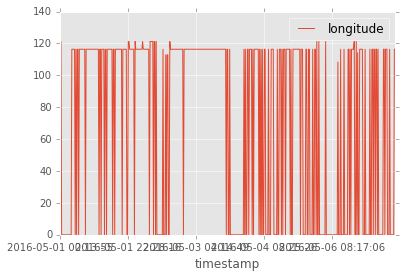

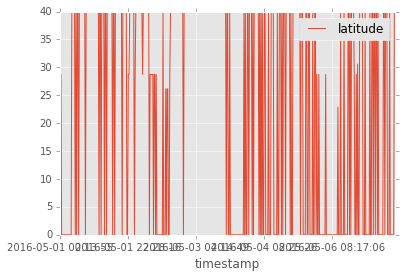

In [14]:
eventsDataFor2Device=eventsData[eventsData.device_id==mostActiveDeviceIds[1][0]].sort_values(['timestamp'])
eventsDataFor2Device.plot(x='timestamp',y='longitude')
eventsDataFor2Device.plot(x='timestamp',y='latitude')
print("======Movement of the 2nd most active device ========================>")
plt.show()#Again the second most active person also moves/travels a lot
#Simailar to 1st person=>long and lat values are frequently dropping to 0[Not sure if there is N/w issue at his place]
#0s are actually NaN : i.e. we don't have data for these points : We can think about Imputations probably[One thing to try]

======Movement of the 3rd most active device ========================>


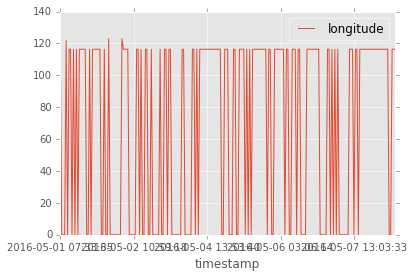

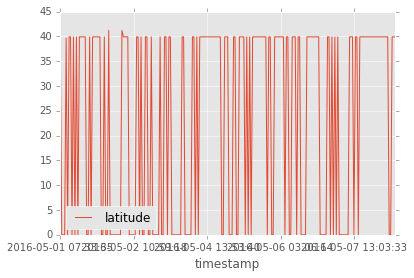

In [15]:
eventsDataFor3Device=eventsData[eventsData.device_id==mostActiveDeviceIds[2][0]].sort_values(['timestamp'])
eventsDataFor3Device.plot(x='timestamp',y='longitude')
eventsDataFor3Device.plot(x='timestamp',y='latitude')
print("======Movement of the 3rd most active device ========================>")
plt.show()#If we ignore sudden 0's : 3rd most active person doesn't move/travel a lot
#Simailar to 1st and 2nd person=>long and lat values are frequently 0[Missing Data issue - It's not N/w issue]

==============Movement of  3  th most active device============>


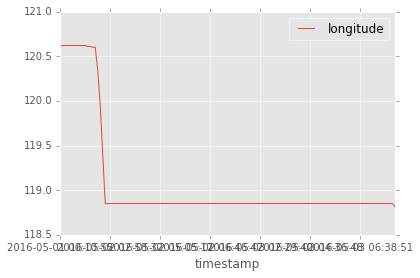

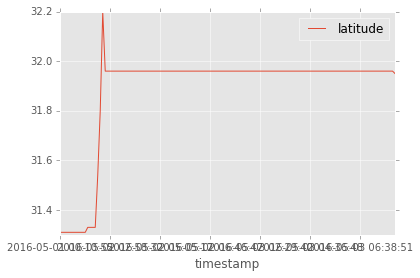

==============Movement of  4  th most active device============>


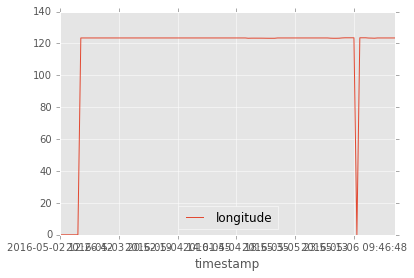

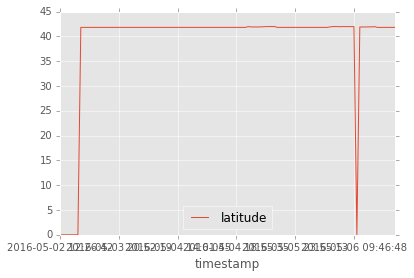

==============Movement of  5  th most active device============>


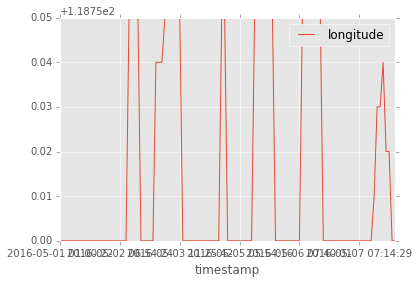

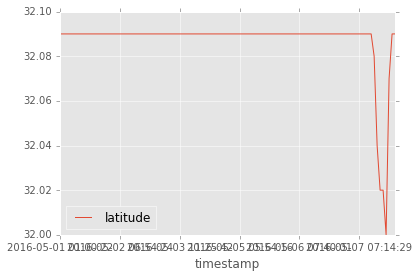

==============Movement of  6  th most active device============>


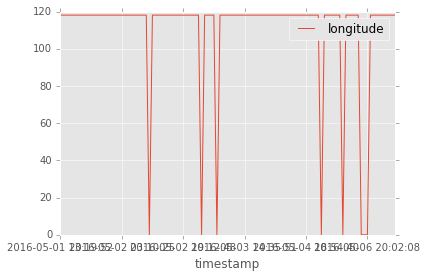

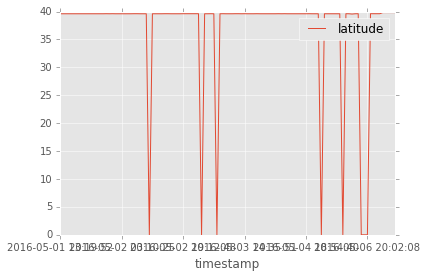

==============Movement of  7  th most active device============>


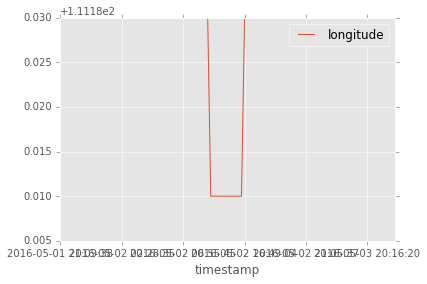

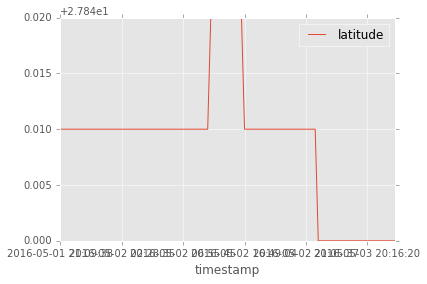

==============Movement of  8  th most active device============>


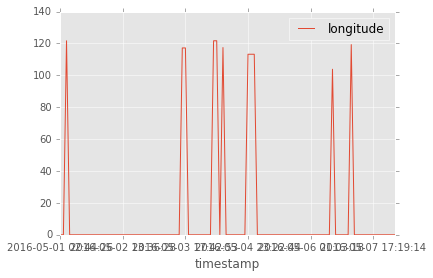

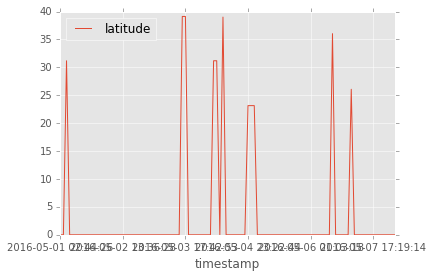

==============Movement of  9  th most active device============>


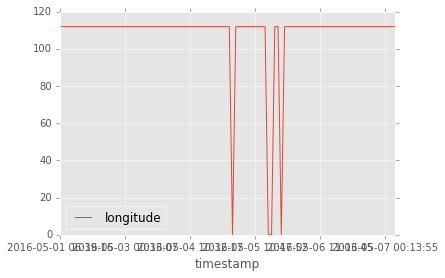

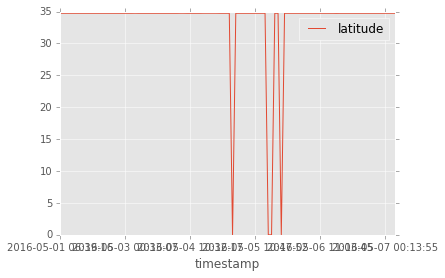

In [17]:
for i in np.arange(3,10):
    eventsDataFor3Device=eventsData[eventsData.device_id==mostActiveDeviceIds[i][0]].sort_values(['timestamp'])
    eventsDataFor3Device.plot(x='timestamp',y='longitude')
    eventsDataFor3Device.plot(x='timestamp',y='latitude')
    print("==============Movement of ",i," th most active device============>")
    plt.show()

In [11]:
#next Task we should plot these movement after excluding 0s/NaN: That will provide easier visualization